# Exploring the ISIC Dataset


Here is someone's guide to the competition: [Link](https://www.kaggle.com/competitions/isic-2024-challenge/discussion/543310)
The authors main takeaways: 
 - Use state of the art foundation models 
 - Clean, augment, and batchify the data 


## Metabasics of the Data 
- Data split into 2 sets: train, test 
- Both sets contain an image paired with metadata. The metadata contains basics such as age, lots of valuable information that describes the image in greater detail. There is information about shape, color, perimeter, location on body, etc 
- The images come from a device that captures total-body-photography
- The images are all of uniform size (15x15)mm
> Vectra WB360, a 3D TBP product from Canfield Scientific, captures the complete visible cutaneous surface area in one macro-quality resolution tomographic image. An AI-based software then identifies individual lesions on a given 3D capture. This allows for the image capture and identification of all lesions on a patient, which are exported as individual 15x15 mm field-of-view cropped photos. The dataset contains every lesion from a subset of thousands of patients seen between the years 2015 and 2024 across nine institutions and three continents.

The images come in a hdf5 file format. The hdf5 file format allows for easy storage of large amounts of data with easy retrieval. To access it we need to use a few python libraries such as hdf5. However within this file structure, the images are stored as jpegs. 

In [43]:
#Imports 
import os
import h5py
import numpy as np
from PIL import Image

In [25]:
file_dict = {
    "sample_sub": "sample_submission.csv",
    "test_images": "test-image.hdf5",
    "test_metadata": "test-metadata.csv",
    "train_images": "train-image.hdf5",
    "train_metadata": "train_metadata.csv"
}
for key in file_dict.keys():
    path = os.path.join(os.getcwd(), '..', 'data/isic-2024-challenge', file_dict[key])
    path = os.path.normpath(path)
    file_dict[key] = path
file_dict

{'sample_sub': '/Users/rakin/Desktop/Agent-O/data/isic-2024-challenge/sample_submission.csv',
 'test_images': '/Users/rakin/Desktop/Agent-O/data/isic-2024-challenge/test-image.hdf5',
 'test_metadata': '/Users/rakin/Desktop/Agent-O/data/isic-2024-challenge/test-metadata.csv',
 'train_images': '/Users/rakin/Desktop/Agent-O/data/isic-2024-challenge/train-image.hdf5',
 'train_metadata': '/Users/rakin/Desktop/Agent-O/data/isic-2024-challenge/train_metadata.csv'}

In [44]:
# Code Attribution: https://www.geeksforgeeks.org/hdf5-files-in-python/


path = file_dict["train_images"]
f = h5py.File(path, 'r')
print("Count of data: ", len(f.keys()))
list(f.keys())[:5]



Count of data:  401059


['ISIC_0015670',
 'ISIC_0015845',
 'ISIC_0015864',
 'ISIC_0015902',
 'ISIC_0024200']

In the cell above we grab keys from the h5 file and print the first 5 datsets. We see our counts of keys is about 400k. Each of these corresponds to a single image of a lesion. The key also corresponds to the unique key of the metadataset. 


In [45]:
keys = list(f.keys())
imageo = f[keys[0]] #first image

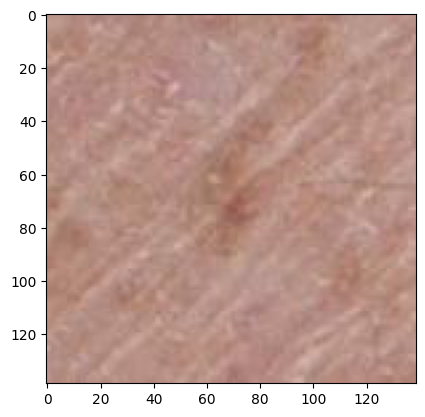

In [68]:
import h5py
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
with h5py.File(file_dict["train_images"]) as f:
    plt.imshow(Image.open(BytesIO(imageo[()])))
    # to get the image we need to go from bytes to image

In [69]:
t = Image.open(BytesIO(imageo[()]))

In [72]:
t.size


(139, 139)